In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
import matplotlib
from matplotlib import rcParams
import matplotlib.pyplot as plt
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 16

import numpy as np
import pandas as pd
from tqdm import tqdm
import cmasher as cmr

from matplotlib import colors

In [2]:
data_dir = "/data/jdli/gaia/"

fname = "ap_xp_13286.npy"
data = np.load(data_dir+fname, allow_pickle=True).item()

In [7]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

def scatter(predictions, targets):
    return np.std(predictions - targets)

In [4]:
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# print(len(cat))
# X = np.c_[data_cont['norm_bp_coef'], data_cont['norm_rp_coef']]
# Y = np.c_[np.log10(data_cont['df'][['TEFF']].values), data_cont['df']['LOGG'].values]

# xp_ap = np.hstack((xp_coef, ap_spec))
X = data['xp_ap']
Y = data['labels'][:,2]
print(X.shape, Y.shape)

# np.save(data_dir+"ap17_xp_post.npy", X, Y)


X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.05, random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

/data/jdli/anaconda3/envs/gaia/lib/python3.9/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1. is an invalid version and will not be supported in a future release
  warnings.warn(


(13286, 7624) (13286,)
(12621, 7624) (665, 7624) (12621,) (665,)


In [5]:
reg = xgb.XGBRegressor(
    eval_metric=mean_squared_error,
    learning_rate=5e-1, n_jobs=32,
    reg_alpha=0.5, gamma=0.5,
)

reg.fit(
    X_train, y_train, 
        # eval_set=[(X_test, y_test)]
       )

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=<function mean_squared_error at 0x7f33e456af70>,
             gamma=0.5, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=32, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.5, reg_lambda=1, ...)

0.2752426


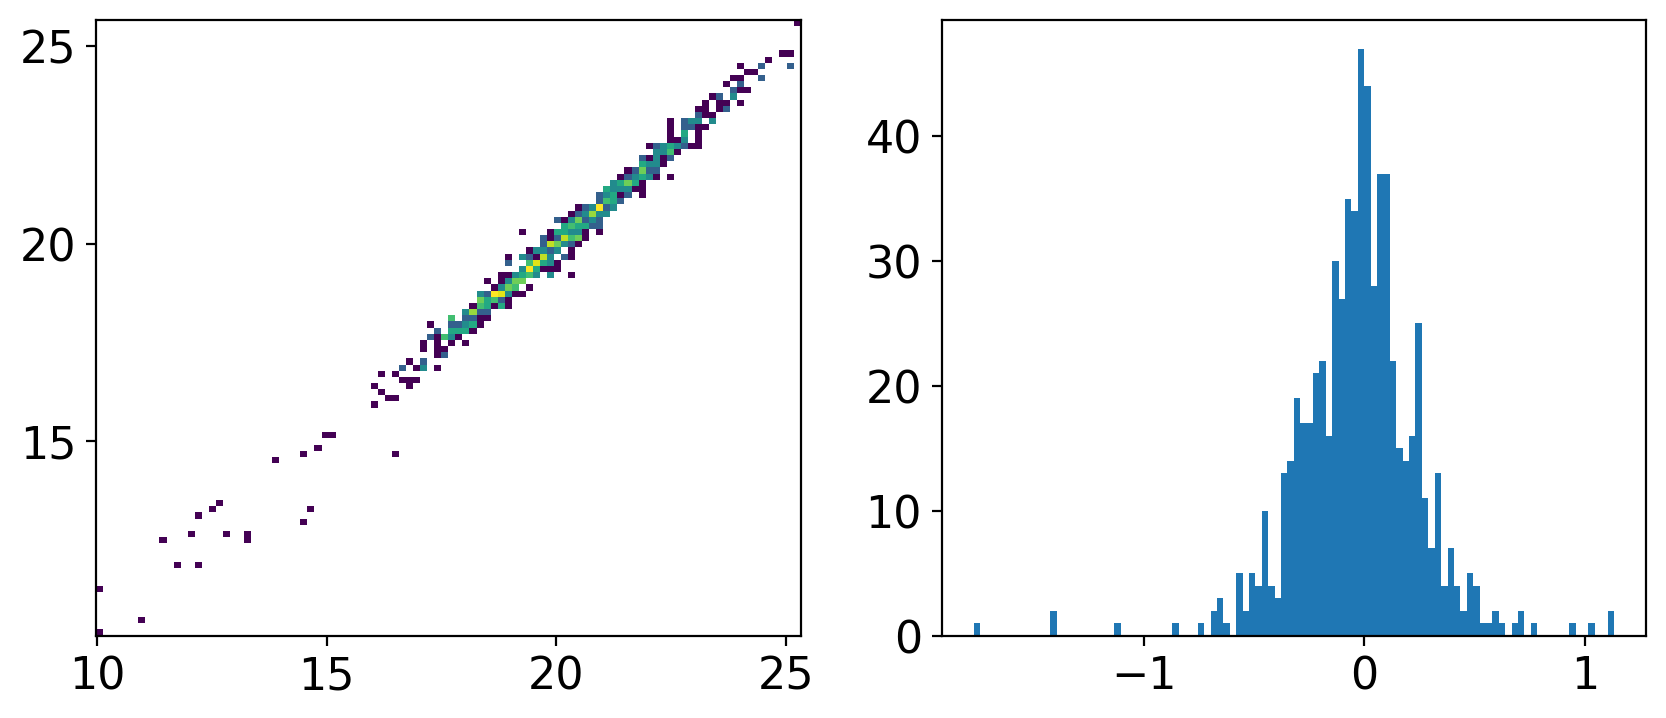

In [16]:
y_pred = reg.predict(X_test).flatten()

fig, axs = plt.subplots(1,2, figsize=(10,4))
ax1, ax2 = axs.ravel()


ax1.hist2d(y_test, y_pred, norm=colors.LogNorm(), bins=100);

ax2.hist(y_pred-y_test, bins=100)

print(scatter(y_test, y_pred))


# Only AP

In [17]:

X = data['xp_ap'][:,110:]
Y = data['labels'][:,2]
print(X.shape, Y.shape)


X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.05, random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13286, 7514) (13286,)
(12621, 7514) (665, 7514) (12621,) (665,)


In [18]:
reg = xgb.XGBRegressor(
    eval_metric=mean_squared_error,
    learning_rate=5e-1, n_jobs=32,
    reg_alpha=0.5, gamma=0.5,
)

reg.fit(
    X_train, y_train, 
        # eval_set=[(X_test, y_test)]
       )

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=<function mean_squared_error at 0x7f33e456af70>,
             gamma=0.5, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=32, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.5, reg_lambda=1, ...)

0.2651723


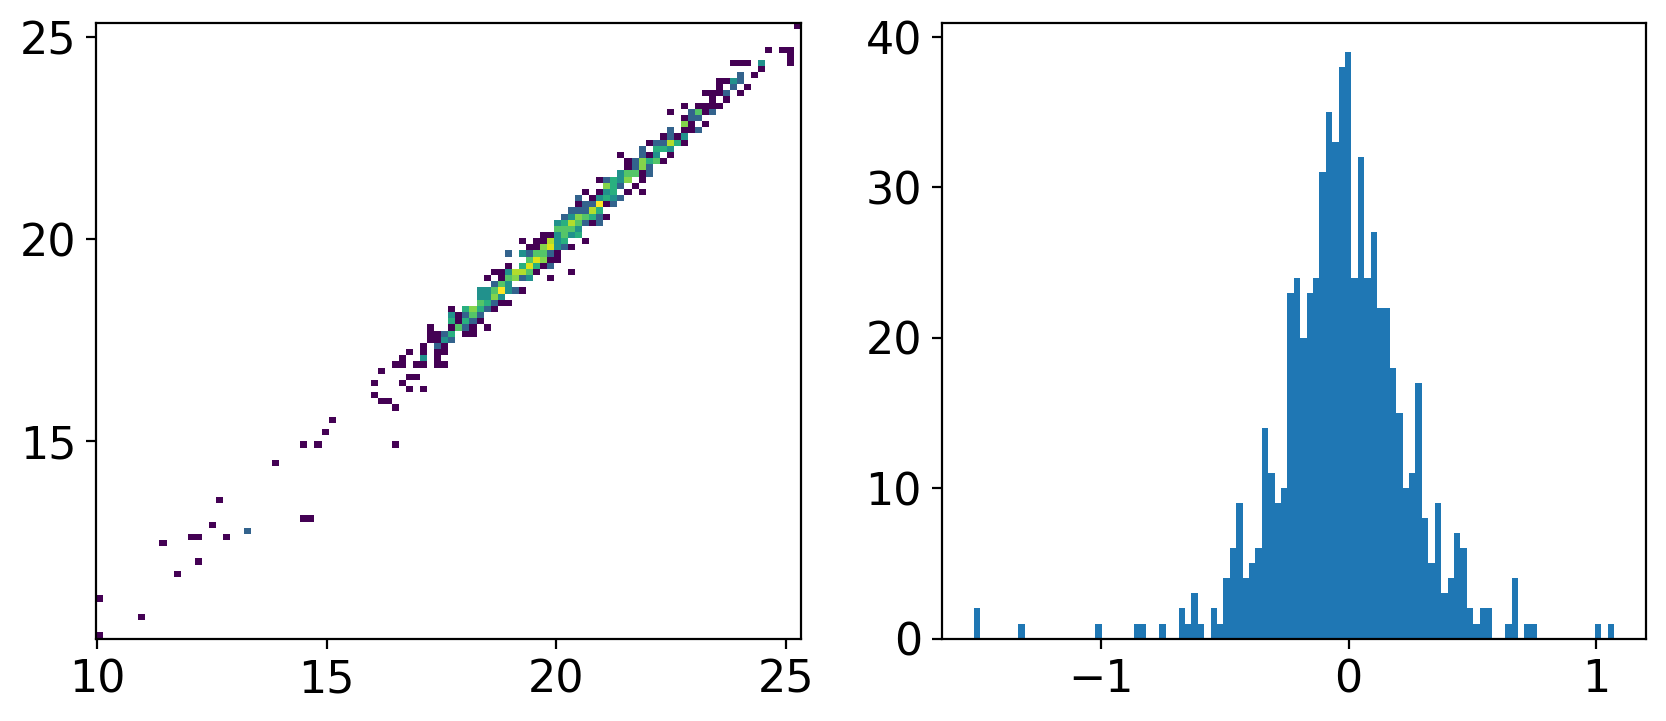

In [19]:
y_pred = reg.predict(X_test).flatten()

fig, axs = plt.subplots(1,2, figsize=(10,4))
ax1, ax2 = axs.ravel()


ax1.hist2d(y_test, y_pred, norm=colors.LogNorm(), bins=100);

ax2.hist(y_pred-y_test, bins=100)

print(scatter(y_test, y_pred))


# Only XP

In [20]:
X = data['xp_ap'][:, :110]
Y = data['labels'][:,2]
print(X.shape, Y.shape)


X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.05, random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13286, 110) (13286,)
(12621, 110) (665, 110) (12621,) (665,)


In [21]:
reg = xgb.XGBRegressor(
    eval_metric=mean_squared_error,
    learning_rate=5e-1, n_jobs=32,
    reg_alpha=0.5, gamma=0.5,
)

reg.fit(
    X_train, y_train, 
        # eval_set=[(X_test, y_test)]
       )

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=<function mean_squared_error at 0x7f33e456af70>,
             gamma=0.5, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=32, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0.5, reg_lambda=1, ...)

1.0191914


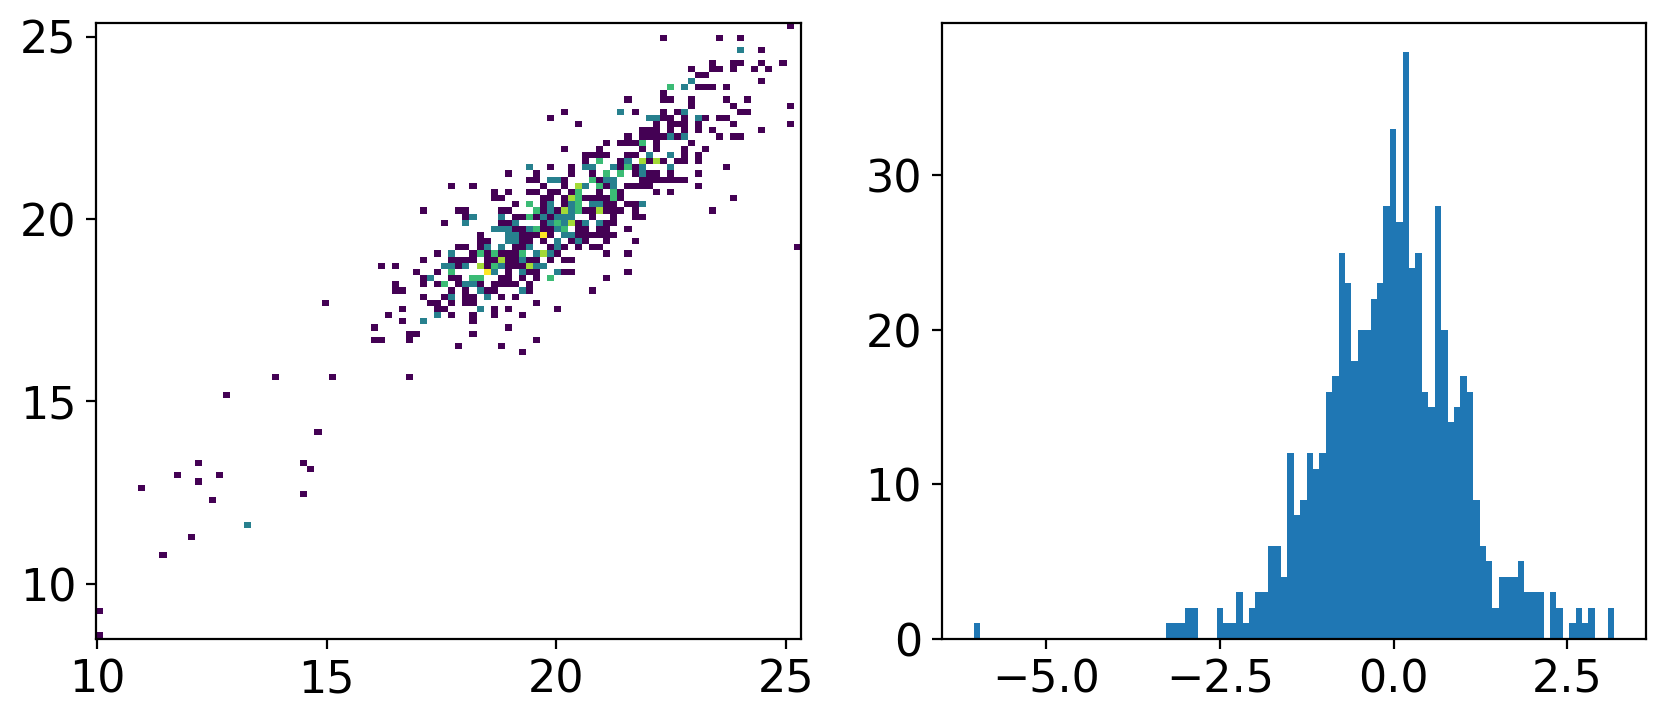

In [22]:
y_pred = reg.predict(X_test).flatten()

fig, axs = plt.subplots(1,2, figsize=(10,4))
ax1, ax2 = axs.ravel()


ax1.hist2d(y_test, y_pred, norm=colors.LogNorm(), bins=100);

ax2.hist(y_pred-y_test, bins=100)

print(scatter(y_test, y_pred))


# Downsampling AP spectra to ~2000

In [24]:
from laspec import convolution

In [ ]:
wave_ap = 

wave_conv, flux_conv = convolution.conv_spec(wave, flux, R_hi=3e5, R_lo=2000)